In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [7]:
df = pd.read_csv("sorghum/height.csv")
df = df.dropna(axis=0)
display(df)

,1,2,3,4,5,6
0,142.0,152.0,110.0,158.0,137.0,160
1,168.0,170.0,141.0,135.0,109.0,152
2,142.0,128.0,145.0,165.0,154.0,172
3,148.0,144.0,157.0,162.0,92.0,158
4,152.0,142.0,137.0,190.0,113.0,140
5,150.0,125.0,110.0,100.0,143.0,129
6,143.0,162.0,125.0,153.0,162.0,135
7,158.0,152.0,134.0,189.0,118.0,125
8,76.0,145.0,133.0,122.0,117.0,160
9,130.0,128.0,63.0,138.0,132.0,152


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


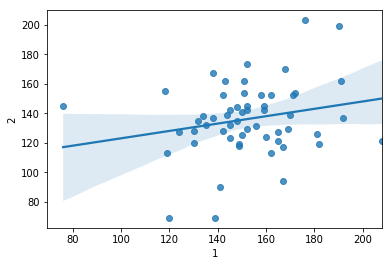

In [8]:
sns.regplot(x='1', y='2', data=df)

In [9]:
# 返回的结果是一个包含统计量w和p-值的元组。可以看到，p-值非常小，接近于0，于是可以拒绝原假设。我们认为数据不符合正态分布。
stats.shapiro(df['1'])

(0.9662286043167114, 0.11784745007753372)

In [10]:
# 相关系数，显著性区别
stats.pearsonr(df['1'], df['2'])

(0.22004580144687177, 0.10319143049881369)

In [17]:
anova = pd.DataFrame(index=df.keys(), columns=df.keys())
for k1 in df.keys():
    for k2 in df.keys():
        Fv, pv = stats.f_oneway(df[k1], df[k2])
        anova[k1][k2] = pv
display(anova)
display('p <= 0.05:')
display(anova<=0.05)
display('p <= 0.01:')
display(anova<=0.01)

,1,2,3,4,5,6
1,1,0.000308612,0.00375032,0.664863,0.164238,0.00094074
2,0.000308612,1,0.281368,7.26171e-05,0.0156734,0.74042
3,0.00375032,0.281368,1,0.000932019,0.12494,0.46872
4,0.664863,7.26171e-05,0.000932019,1,0.0691234,0.000237135
5,0.164238,0.0156734,0.12494,0.0691234,1,0.0366029
6,0.00094074,0.74042,0.46872,0.000237135,0.0366029,1


'p <= 0.05:'

,1,2,3,4,5,6
1,False,True,True,False,False,True
2,True,False,False,True,True,False
3,True,False,False,True,False,False
4,False,True,True,False,False,True
5,False,True,False,False,False,True
6,True,False,False,True,True,False


'p <= 0.01:'

,1,2,3,4,5,6
1,False,True,True,False,False,True
2,True,False,False,True,False,False
3,True,False,False,True,False,False
4,False,True,True,False,False,True
5,False,False,False,False,False,False
6,True,False,False,True,False,False


In [46]:
avg = np.mean(df.values, axis=0)
std = np.std(df.values, axis=0)
print(avg, std)

[ 152.3929  136.0536  140.6607  154.1786  146.7143  137.5893] [ 21.4997  24.3981  20.0217  21.6161  21.0295  24.0956]


In [18]:
def avg_std(df):
    avg = df.mean(axis=0)
    std = df.std(axis=0)
    avg_std = pd.concat([avg, std], axis=1, keys=['avg', 'std'])
    display(avg_std)
avg_std(df)

,avg,std
1,152.392857,21.694305
2,136.053571,24.618854
3,140.660714,20.202859
4,154.178571,21.811679
5,146.714286,21.219814
6,137.589286,24.313690
